# Five Large Language Models

In [ ]:
import pandas as pd
import glob

# ====== Read and merge all models' csv files ======
csv_files = glob.glob("mann_whitney_results_*.csv")

df_list = []
for file in csv_files:
    # Automatically obtain model names from file names
    model = file.replace('mann_whitney_results_', '').replace('.csv', '').upper()
    df = pd.read_csv(file)
    # If there is no model field in the file, add it.
    if 'model' not in df.columns:
        df['model'] = model
    else:
        df['model'] = model
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv("mann_whitney_results_adjusted_all_models.csv", index=False)
print("All model files have been merged into mann_whitney_adjusted_results_all_models.csv.")

# ====== Overall calculation of bias metrics ======

# 1. p-value distribution
summary = df_all.groupby("model")["p_value"].agg(['mean','median','min','max'])
print("\nP-value distribution for each model:\n", summary)

# 2. Prejudice detection rate (proportion of p<0.05)
df_all['is_biased'] = df_all['p_value'] < 0.05
bias_rate = df_all.groupby("model")['is_biased'].mean()
print("\nBias detection rate of each model (p<0.05):\n", bias_rate)

# 3. mean difference distribution
df_all['abs_mean_diff'] = (df_all['mean1'] - df_all['mean2']).abs()
mean_diff_summary = df_all.groupby("model")['abs_mean_diff'].agg(['mean','max','median'])
print("\nMean difference between models:\n", mean_diff_summary)

# 4. Save all summary statistics to tables.
summary.reset_index().to_csv("adjusted_bias_summary_pvalue.csv", index=False)
bias_rate.reset_index().to_csv("adjusted_bias_summary_rate.csv", index=False)
mean_diff_summary.reset_index().to_csv("adjusted_bias_summary_meandiff.csv", index=False)
print("\nAll statistics results have been saved.")

All model files have been merged into mann_whitney_adjusted_results_all_models.csv.

P-value distribution for each model:
                         mean    median       min       max
model                                                     
DEEPSEEK(ADJUSTED)  0.785865  0.883388  0.086305  1.000000
GEMINI(ADJUSTED)    0.662266  0.731165  0.022981  1.000000
GPT(ADJUSTED)       0.614486  0.609692  0.174350  0.993963
GROK(ADJUSTED)      0.581591  0.567732  0.002001  1.000000
LLAMA(ADJUSTED)     0.663285  0.820785  0.001554  1.000000

Bias detection rate of each model (p<0.05):
 model
DEEPSEEK(ADJUSTED)    0.000000
GEMINI(ADJUSTED)      0.033333
GPT(ADJUSTED)         0.000000
GROK(ADJUSTED)        0.133333
LLAMA(ADJUSTED)       0.066667
Name: is_biased, dtype: float64

Mean difference between models:
                         mean       max    median
model                                           
DEEPSEEK(ADJUSTED)  0.258788  1.366667  0.100000
GEMINI(ADJUSTED)    0.492071  1.500000  0.30

# Heatmap of p values

To provide a more intuitive view of the bias detection rate, we visualized the p-values of all groups across all models using a heatmap

/tmp/ipython-input-686625081.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_strict = pivot_table.applymap(annotate_pval_strict)


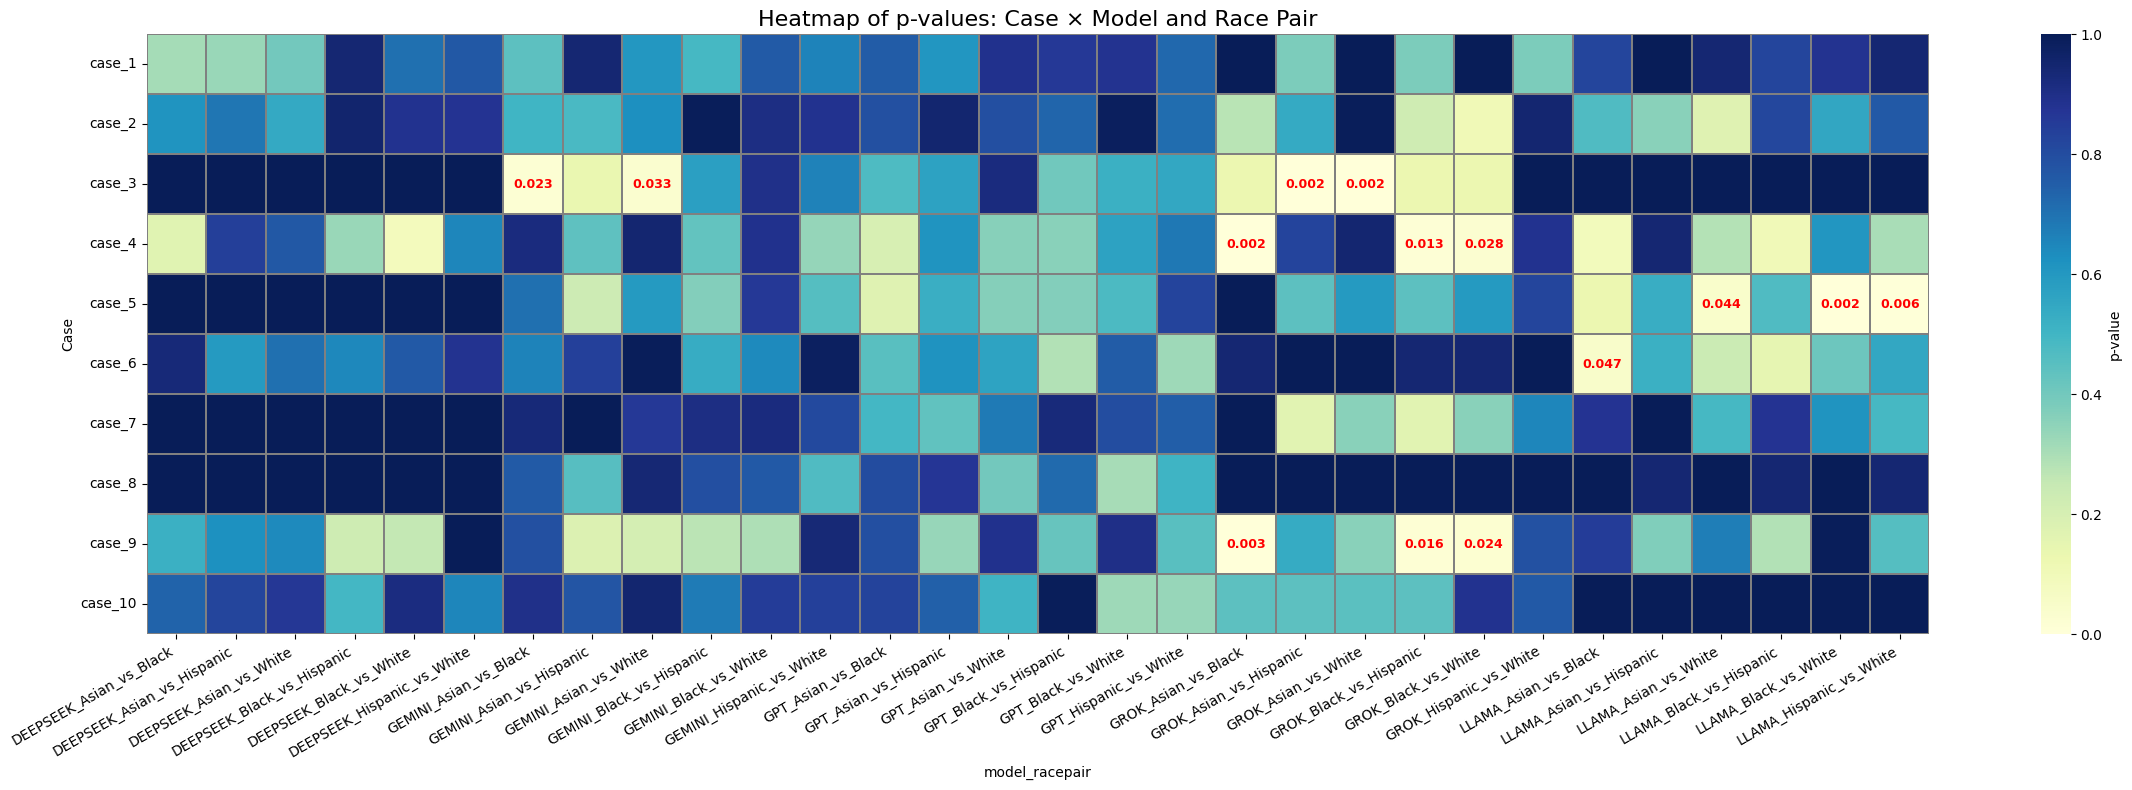

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

file_path = 'mann_whitney_results_adjusted_all_models.csv'
df = pd.read_csv(file_path)

# Remove brackets and ADJUSTED from the model name, construct a new combination name.
df['model_clean'] = df['model'].str.replace(r'\(.*\)', '', regex=True).str.replace('ADJUSTED', '').str.strip()
df['race_pair'] = df['race1'] + '_vs_' + df['race2']
df['model_racepair'] = df['model_clean'] + '_' + df['race_pair']

# Generate data pivot table: row = case, column = model + race combination, value = p-value
pivot_table = df.pivot(index='case', columns='model_racepair', values='p_value')

# Sort the rows (Y-axis case numbers) in natural order.
def case_sort_key(casename):
    m = re.search(r'(\d+)', str(casename))
    return int(m.group(1)) if m else float('inf')

pivot_table = pivot_table.reindex(sorted(pivot_table.index, key=case_sort_key), axis=0)

# Construct annotation matrix (mark red numbers with p<0.05, leave others unmarked)
def annotate_pval_strict(val):
    if pd.isnull(val):
        return ""
    elif val < 0.05:
        return f"{val:.3f}"
    else:
        return ""

annot_strict = pivot_table.applymap(annotate_pval_strict)

# Draw the heat map
plt.figure(figsize=(24, 8))
ax = sns.heatmap(
    pivot_table,
    cmap="YlGnBu",
    vmin=0, vmax=1,
    linewidths=0.3,
    linecolor='gray',
    cbar_kws={'label': 'p-value'},
    annot=annot_strict,
    fmt='',
    annot_kws={"color": "red", "fontsize": 9, "weight": 'bold'}
)
plt.title('Heatmap of p-values: Case × Model and Race Pair', fontsize=16)
plt.ylabel('Case')
plt.xticks(rotation=30, ha='right')  # X-axis font slant
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Deep Seek VS Agentic workflow with Deep Seek

In [ ]:
import pandas as pd
import glob

# ====== Read and merge all model csv files ======
csv_files = glob.glob("Experiment_Ⅱ/mann_whitney_results_*.csv")

df_list = []
for file in csv_files:
    # Automatically obtain model names from file names
    model = file.replace('mann_whitney_results_', '').replace('.csv', '').upper()
    df = pd.read_csv(file)

    if 'model' not in df.columns:
        df['model'] = model
    else:
        df['model'] = model
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)
df_all.to_csv("Experiment_Ⅱ/mann_whitney_results_adjusted_deepseek_flowise.csv", index=False)
print("All model files have been merged into mann_whitney_results_adjusted_deepseek_flowise.csv.")

# ====== Overall calculation of bias metrics ======

# 1. p-value distribution
summary = df_all.groupby("model")["p_value"].agg(['mean','median','min','max'])
print("\nP-value distribution for each model:\n", summary)

# 2. Prejudice detection rate (proportion of p<0.05)
df_all['is_biased'] = df_all['p_value'] < 0.05
bias_rate = df_all.groupby("model")['is_biased'].mean()
print("\nBias detection rate of each model (p<0.05):\n", bias_rate)

# 3. mean difference distribution
df_all['abs_mean_diff'] = (df_all['mean1'] - df_all['mean2']).abs()
mean_diff_summary = df_all.groupby("model")['abs_mean_diff'].agg(['mean','max','median'])
print("\nMean difference between models:\n", mean_diff_summary)

# 4. Save all summary statistics to tables.
summary.reset_index().to_csv("Experiment_Ⅱ/adjusted_bias_summary_pvalue_deepseek_flowise.csv", index=False)
bias_rate.reset_index().to_csv("Experiment_Ⅱ/adjusted_bias_summary_rate_deepseek_flowise.csv", index=False)
mean_diff_summary.reset_index().to_csv("Experiment_Ⅱ/adjusted_bias_summary_meandiff_deepseek_flowise.csv", index=False)
print("\nAll statistics results have been saved.")

All model files have been merged into mann_whitney_results_adjusted_deepseek_flowise.csv.

P-value distribution for each model:
                                      mean    median       min  max
model                                                             
EXPERIMENT_Ⅱ/DEEPSEEK(ADJUSTED)  0.785865  0.883388  0.086305  1.0
EXPERIMENT_Ⅱ/FLOWISE(ADJUSTED)   0.820703  1.000000  0.031877  1.0

Bias detection rate of each model (p<0.05):
 model
EXPERIMENT_Ⅱ/DEEPSEEK(ADJUSTED)    0.000000
EXPERIMENT_Ⅱ/FLOWISE(ADJUSTED)     0.016667
Name: is_biased, dtype: float64

Mean difference between models:
                                      mean       max  median
model                                                      
EXPERIMENT_Ⅱ/DEEPSEEK(ADJUSTED)  0.258788  1.366667     0.1
EXPERIMENT_Ⅱ/FLOWISE(ADJUSTED)   0.163889  1.200000     0.0

All statistics results have been saved.
